In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
%matplotlib inline

In [5]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import folium

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import requests
import plotly.express as px
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/conjunto_de_datos_iter_00CSV20.csv') 
repo_url = 'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json' #Archivo GeoJSON
mx_regions_geo = requests.get(repo_url).json()
df
# NOM_ENT = Nombre oficial de la entidad federativa.

<ipython-input-8-a025fcd143e9>:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/conjunto_de_datos_iter_00CSV20.csv')


ENTIDAD         NOM_ENT  MUN                             NOM_MUN  \
0             0  Total nacional    0                      Total nacional   
1             0  Total nacional    0                      Total nacional   
2             0  Total nacional    0                      Total nacional   
3             1  Aguascalientes    0  Total de la entidad Aguascalientes   
4             1  Aguascalientes    0  Total de la entidad Aguascalientes   
...         ...             ...  ...                                 ...   
195657       32       Zacatecas   58               Santa María de la Paz   
195658       32       Zacatecas   58               Santa María de la Paz   
195659       32       Zacatecas   58               Santa María de la Paz   
195660       32       Zacatecas   58               Santa María de la Paz   
195661       32       Zacatecas   58               Santa María de la Paz   

         LOC                       NOM_LOC          LONGITUD          LATITUD  \
0          0                Total nacional               NaN              NaN   
1       9998   Localidades de una vivienda               NaN              NaN   
2       9999  Localidades de dos viviendas               NaN              NaN   
3          0           Total de la Entidad               NaN              NaN   
4       9998   Localidades de una vivienda               NaN              NaN   
...      ...                           ...               ...              ...   
195657    37                   Mesa Grande  103°24'52.925" W  21°33'12.375" N   
195658    39                    San Isidro  103°20'14.164" W  21°29'11.130" N   
195659    41         San Miguel Tepetitlán  103°20'09.356" W  21°30'15.168" N   
195660    42                    San Rafael  103°22'20.134" W  21°31'39.341" N   
195661  9998   Localidades de una vivienda               NaN              NaN   

       ALTITUD     POBTOT  ...   VPH_CEL VPH_INTER  VPH_STVP VPH_SPMVPI  \
0          NaN  126014024  ...  30775898  18307193  15211306    6616141   
1          NaN     250354  ...     47005      8385     18981       1732   
2          NaN     147125  ...     25581      5027     11306        971   
3          NaN    1425607  ...    359895    236003    174089      98724   
4          NaN       3697  ...       732       205       212         48   
...        ...        ...  ...       ...       ...       ...        ...   
195657  1944.0        165  ...        24         9        13          0   
195658  2031.0          1  ...         *         *         *          *   
195659  1977.0         97  ...        21        12        21          1   
195660  2042.0          3  ...         *         *         *          *   
195661     NaN         32  ...         7         2         6          1   

        VPH_CVJ VPH_SINRTV VPH_SINLTC VPH_SINCINT VPH_SINTIC TAMLOC  
0       4047100    1788552    3170894    15108204     852871      *  
1          1113      12775      14143       51293       7154      *  
2           708       8247      10065       29741       5283      *  
3         70126       6021      15323      128996       1711      *  
4            41         39         62         530         20      *  
...         ...        ...        ...         ...        ...    ...  
195657        0          3          9          38          1      1  
195658        *          *          *           *          *      1  
195659        1          1         10          19          0      1  
195660        *          *          *           *          *      1  
195661        1          1          2           7          1      *  

[195662 rows x 286 columns]

In [19]:
# Distribución de NaNs
df.isna().sum(axis=0)
# Quitamos los NaNs y los cambiamos por "0"
df = df.fillna(0)
# Observamos la distribución de NaNs después de la eliminación
df.isna().sum()

ENTIDAD        0
NOM_ENT        0
MUN            0
NOM_MUN        0
LOC            0
              ..
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC     0
TAMLOC         0
POBTOT_Log     0
Length: 287, dtype: int64

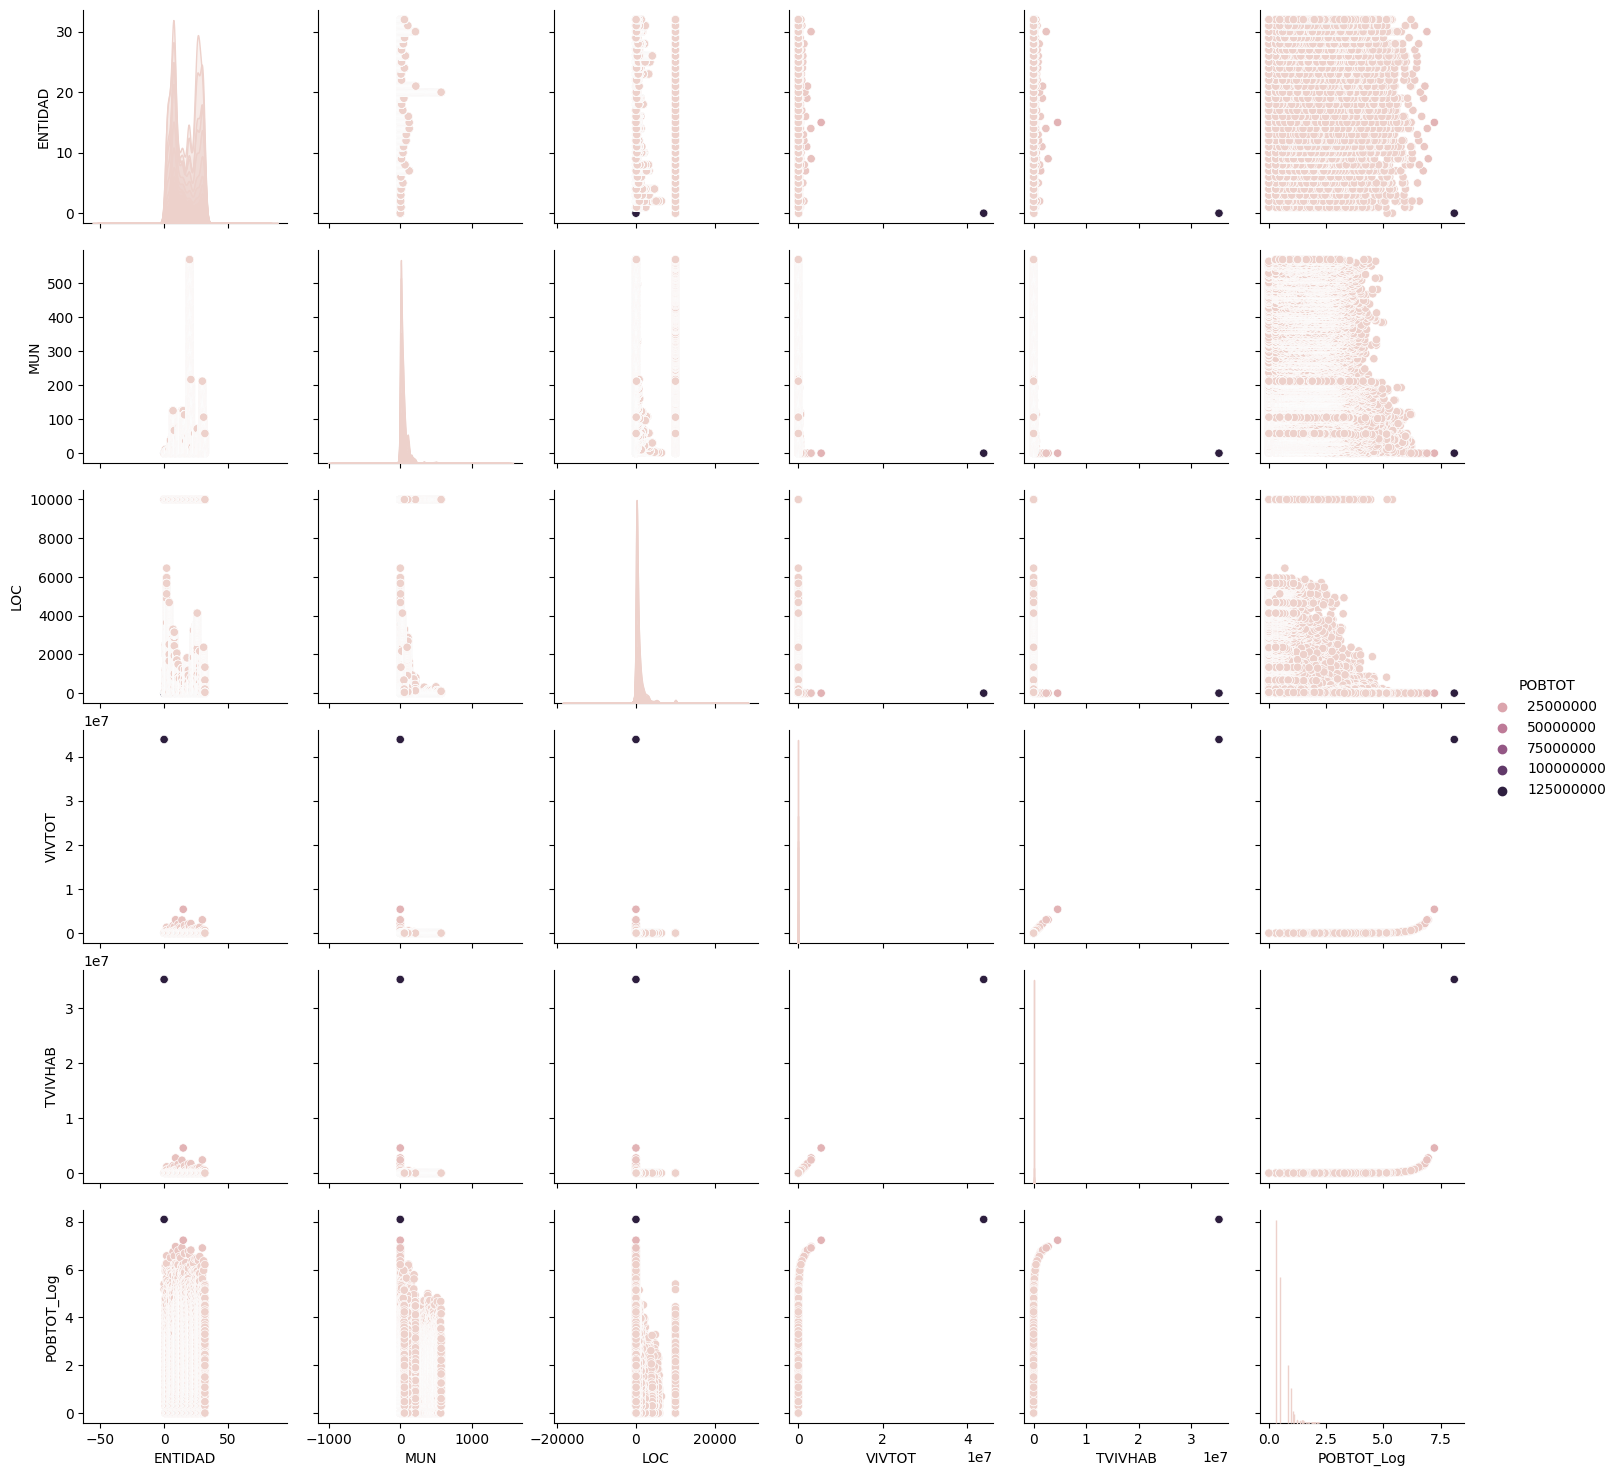

In [10]:
# Pairplot
sns.pairplot(data=df, hue='POBTOT')

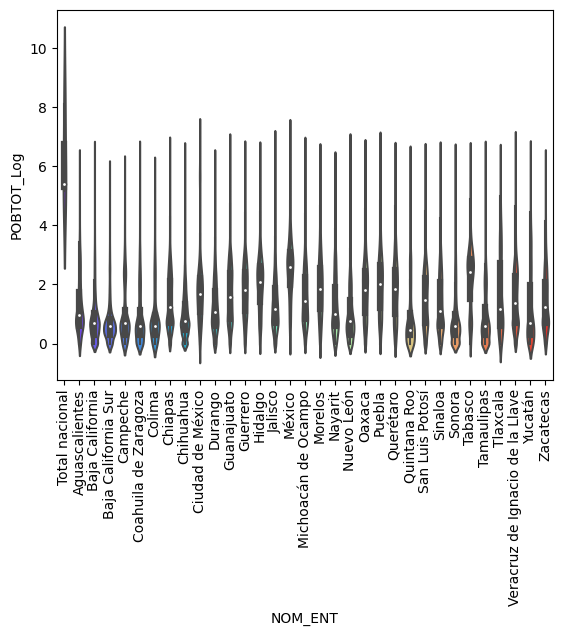

In [15]:
# Violinplot
sns.violinplot(data=df, x='NOM_ENT', y='POBTOT_Log', palette='rainbow')
plt.xticks(rotation=90)
plt.show()
     

<ipython-input-16-b8725f5f54a6>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

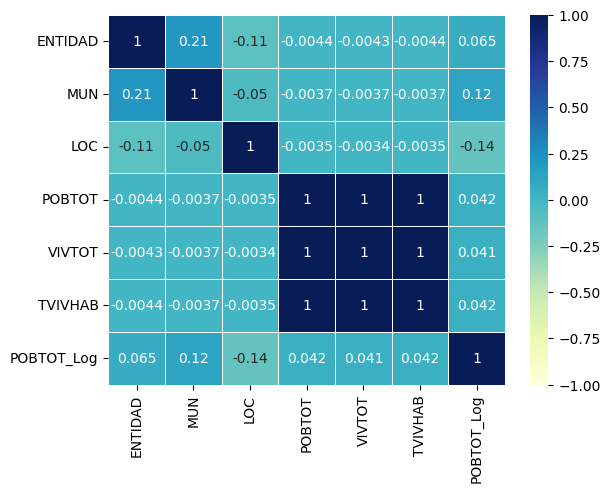

In [16]:
# Heatmap
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)

In [9]:
df = df.drop(index=df[(df['POBTOT']==0)].index)
df['POBTOT_Log'] = np.log10(df['POBTOT'])
fig = px.choropleth(data_frame=df, 
                    geojson=mx_regions_geo, 
                    locations='NOM_ENT', # nombre de la columna del Dataframe
                    featureidkey='properties.name',  # ruta al campo del archivo GeoJSON con el que se hará la relación (nombre de los estados)
                    color='POBTOT_Log', #El color depende de las cantidades
                    color_continuous_scale="burg", 
                    #scope="north america"
                   )
fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")

fig.update_layout(
    title_text = 'Población total por estado en México',
    font=dict(
        #family="Courier New, monospace",
        family="Ubuntu",
        size=18,
        color="#7f7f7f"
    ),
    annotations = [dict(
        x=0.55,
        y=-0.1,
        xref='paper',
        yref='paper',
        text='Fuente: <a href="https://www.inegi.org.mx/programas/ccpv/2020/#Microdatos">\
            INEGI </a>',
        showarrow = False
    )]
)

fig.show()